In [91]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cna-data/training_set_features.csv
/kaggle/input/cna-data/test_set_features.csv
/kaggle/input/cna-data/training_set_labels.csv
/kaggle/input/mod-task/mod_task.csv


In [92]:
df1=pd.read_csv('/kaggle/input/mod-task/mod_task.csv')
df2=pd.read_csv('/kaggle/input/cna-data/training_set_features.csv')

In [93]:
df2.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [94]:
df1.head()

,Unnamed: 0,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,0.0,0.000000,0.0,0,0
1,1,1,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,0.5,0.000000,0.0,pxcmvdjn,xgwztkwe
2,2,2,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,0.5,0.666667,0.0,rucpziij,xtkaffoo
3,3,3,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,1.0,0.000000,0.0,0,0
4,4,4,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,0.5,0.333333,0.0,wxleyezf,emcorrxb


In [95]:
df1['income_poverty'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', '0'],
      dtype=object)

In [96]:
for i in df1.index:
    if(df1.loc[i ,'income_poverty']=='Below Poverty'):
        df1.loc[i ,'income_poverty']=0
    elif(df1.loc[i ,'income_poverty']=='<= $75,000, Above Poverty'):
        df1.loc[i ,'income_poverty']=1
    elif(df1.loc[i ,'income_poverty']=='> $75,000'):
        df1.loc[i ,'income_poverty']=2

In [97]:
df1['income_poverty'] = df1['income_poverty'].astype(float)

In [98]:
df1['marital_status'].unique()

array(['Not Married', 'Married', '0'], dtype=object)

In [99]:
for i in df1.index:
    if(df1.loc[i ,'marital_status']=='Not Married'):
        df1.loc[i ,'marital_status']=0
    elif(df1.loc[i ,'marital_status']=='Married'):
        df1.loc[i ,'marital_status']=1

In [100]:
df1['marital_status'] = df1['marital_status'].astype(float)

In [101]:
df1.dtypes

Unnamed: 0                       int64
respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                     

In [102]:
num_cols=df1.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)

Index(['Unnamed: 0', 'respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'income_poverty',
       'marital_status', 'census_msa', 'household_adults',
       'household_children'],
      dtype='object')


In [124]:
req_cols_xyz=['xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc','census_msa', 'household_adults',
       'household_children'
        ]

In [111]:
labels=pd.read_csv('/kaggle/input/cna-data/training_set_labels.csv')
labels.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1[req_cols_xyz], labels['xyz_vaccine'], test_size=0.25, random_state=42)


In [127]:
X_train.shape

(20030, 20)

In [128]:
from sklearn.linear_model import LogisticRegression

model_xyz=LogisticRegression(max_iter=1000)

In [170]:
model_xyz.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [162]:
model_xyz.score(X_test,y_test)

0.8475363187060057

In [132]:
y_pred_prob = model_xyz.predict_proba(X_test)

In [160]:
y_pred_prob

array([[0.99531157, 0.00468843],
       [0.99666355, 0.00333645],
       [0.86226774, 0.13773226],
       ...,
       [0.64974681, 0.35025319],
       [0.8861456 , 0.1138544 ],
       [0.85954989, 0.14045011]])

In [133]:
y_pred=model_xyz.predict(X_test)

In [161]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [134]:
y_test

15772    0
9407     0
16515    0
23353    0
10008    0
        ..
25990    0
14302    0
3817     1
13912    0
16392    0
Name: xyz_vaccine, Length: 6677, dtype: int64

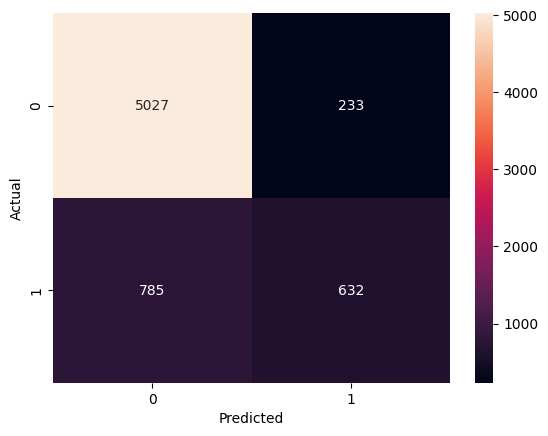

In [135]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'y_true' are the true labels and 'y_pred' are the predicted labels
cm = confusion_matrix(y_test,y_pred)

# Plotting the confusion matrix using seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [137]:
Test=pd.read_csv('/kaggle/input/cna-data/test_set_features.csv')
Test.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [138]:
for i in Test.index:
    if(Test.loc[i ,'census_msa']=='Non-MSA'):
        Test.loc[i ,'census_msa']=0
    elif(Test.loc[i ,'census_msa']=='MSA, Not Principle  City'):
        Test.loc[i ,'census_msa']=1
    elif(Test.loc[i ,'census_msa']=='MSA, Principle City'):
        Test.loc[i ,'census_msa']=2

In [139]:
Test['census_msa'].unique()

array([1, 0, 2], dtype=object)

In [141]:
Test['census_msa'] = Test['census_msa'].astype(float)

In [142]:
Test_num_cols=Test.select_dtypes(include=['int64', 'float64']).columns
print(Test_num_cols)

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'census_msa',
       'household_adults', 'household_children'],
      dtype='object')


In [143]:
for i in Test_num_cols[1:]:
    Test[str(i)]=Test[str(i)]/Test[str(i)].max()

In [144]:
Test.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,0.666667,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,0.5,0.333333,0.000000,atmlpfrs,hfxkjkmi
1,26708,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,0.0,1.000000,0.000000,atmlpfrs,xqwwgdyp
2,26709,0.666667,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,0.0,0.333333,0.000000,nduyfdeo,pvmttkik
3,26710,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,0.5,0.333333,0.000000,NaN,NaN
4,26711,1.000000,0.5,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,0.0,0.000000,0.333333,fcxhlnwr,mxkfnird


In [146]:
for i in Test.columns:
    Test[str(i)]=Test[str(i)].fillna(0)

In [148]:
pred=model_xyz.predict_proba(Test[req_cols_xyz])
pred

array([[0.79512492, 0.20487508],
       [0.96424134, 0.03575866],
       [0.76573523, 0.23426477],
       ...,
       [0.74984402, 0.25015598],
       [0.96545567, 0.03454433],
       [0.45533265, 0.54466735]])

In [157]:
pred[:,1]

array([0.20487508, 0.03575866, 0.23426477, ..., 0.25015598, 0.03454433,
       0.54466735])

In [ ]:
d = {'respondent_id':Test['respondent_id']}
sub = pd.DataFrame(d)
sub

In [158]:
sub['xyz_vaccine']=pred[:,1]

In [159]:
sub

,respondent_id,xyz_vaccine
0,26707,0.204875
1,26708,0.035759
2,26709,0.234265
3,26710,0.516447
4,26711,0.354212
...,...,...
26703,53410,0.202037
26704,53411,0.054768
26705,53412,0.250156
26706,53413,0.034544


In [163]:
req_cols_seasonal=['xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'census_msa', 'household_adults',
       'household_children']

In [167]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, y_Train, y_Test = train_test_split(df1[req_cols_seasonal], labels['seasonal_vaccine'], test_size=0.25, random_state=42)


In [171]:
from sklearn.linear_model import LogisticRegression

model_seasonal=LogisticRegression(max_iter=1000)

model_seasonal.fit(X_Train,y_Train)

LogisticRegression(max_iter=1000)

In [172]:
model_seasonal.score(X_Train,y_Train)

0.7559161258112831

In [179]:
y_Pred=model_seasonal.predict(X_Test)

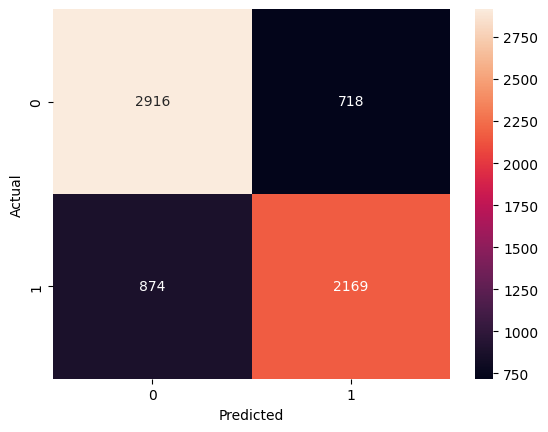

In [180]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'y_true' are the true labels and 'y_pred' are the predicted labels
cm = confusion_matrix(y_Test,y_Pred)

# Plotting the confusion matrix using seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [175]:
y_pred_seasonal=model_seasonal.predict_proba(Test[req_cols_seasonal])

In [176]:
y_pred_seasonal

array([[0.51708336, 0.48291664],
       [0.86383765, 0.13616235],
       [0.49003   , 0.50997   ],
       ...,
       [0.56334529, 0.43665471],
       [0.68964822, 0.31035178],
       [0.34009858, 0.65990142]])

In [177]:
sub['seasonal_vaccine']=y_pred_seasonal[:,1]
sub

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.204875,0.482917
1,26708,0.035759,0.136162
2,26709,0.234265,0.509970
3,26710,0.516447,0.809534
4,26711,0.354212,0.717989
...,...,...,...
26703,53410,0.202037,0.526864
26704,53411,0.054768,0.358801
26705,53412,0.250156,0.436655
26706,53413,0.034544,0.310352


In [181]:
sub.to_csv('submission.csv')